<a href="https://colab.research.google.com/github/MwangiMuriuki2003/MURIUKI/blob/main/JPMorgan_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
try:
    df = pd.read_csv("/content/Task 3 and 4_Loan_Data.csv")
    # Assuming the FICO score column is named 'fico' and default column is named 'default'
    # Please adjust the column names if they are different in your dataset
    data = df[['fico_score', 'default']].sort_values(by='fico_score').values.tolist()
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Generating synthetic data.")
    # Generate synthetic data if the file is not found
    np.random.seed(42)
    n_samples = 1000
    fico_scores = np.random.normal(700, 50, n_samples).astype(int)
    # Ensure FICO scores are within the valid range
    fico_scores = np.clip(fico_scores, 300, 850)

    # Generate default probabilities based on FICO scores (sigmoid decreasing)
    # Adjust the parameters of the sigmoid function as needed
    def default_probability(fico):
        return 1 / (1 + np.exp((fico - 700) / 30))

    default_probs = default_probability(fico_scores)
    defaults = (np.random.random(n_samples) < default_probs).astype(int)

    data = sorted(list(zip(fico_scores, defaults)))

print(f"Loaded {len(data)} data points.")

Data loaded successfully.
Loaded 10000 data points.


In [9]:
# Compute PD per bucket and assign ratings
bucket_results = []
for i in range(K):
    start_index = full_bucket_indices[i]
    end_index = full_bucket_indices[i+1]
    num_records = cumulative_records[end_index] - cumulative_records[start_index]
    num_defaults = cumulative_defaults[end_index] - cumulative_defaults[start_index]

    # Handle empty buckets
    if num_records == 0:
        prob_default_calc = 0.0 # Changed variable name
    else:
        prob_default_calc = num_defaults / num_records # Changed variable name

    # Assign rating (1 for best, K for worst - based on PD)
    # Since higher FICO (lower PD) should get a better rating (lower number),
    # the first bucket (lowest FICO, likely highest PD) gets the worst rating (K),
    # and the last bucket (highest FICO, likely lowest PD) gets the best rating (1).
    rating = K - i

    # Determine the FICO range for the bucket
    fico_range_start = data[start_index][0]
    fico_range_end = data[end_index-1][0] if end_index > start_index else fico_range_start

    bucket_results.append({
        "Rating": rating,
        "FICO Range": f"{fico_range_start} - {fico_range_end}",
        "Number of Records": num_records,
        "Number of Defaults": num_defaults,
        "Probability of Default (PD)": prob_default_calc # Changed variable name
    })

# Sort the results by Rating
bucket_results.sort(key=lambda x: x["Rating"])

# Re-import pandas to ensure pd is the pandas library
import pandas as pd

# Display the results in a table
results_df = pd.DataFrame(bucket_results)
display(results_df)

,Rating,FICO Range,Number of Records,Number of Defaults,Probability of Default (PD)
0,1,697 - 850,1649,76,0.046089
1,2,640 - 697,3207,337,0.105083
2,3,580 - 640,3447,704,0.204236
3,4,521 - 580,1395,534,0.382796
4,5,408 - 521,302,200,0.662252


from matplotlib import pyplot as plt
results_df['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Number of Records'].plot(kind='hist', bins=20, title='Number of Records')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Number of Defaults'].plot(kind='hist', bins=20, title='Number of Defaults')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Probability of Default (PD)'].plot(kind='hist', bins=20, title='Probability of Default (PD)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results_df.groupby('FICO Range').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Rating', y='Number of Records', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Number of Records', y='Number of Defaults', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Number of Defaults', y='Probability of Default (PD)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Rating']
  ys = series['Number of Records']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('Rating', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('FICO Range')):
  _plot_series(series, series_name, i)
  fig.legend(title='FICO Range', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Rating')
_ = plt.ylabel('Number of Records')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Rating']
  ys = series['Number of Defaults']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('Rating', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('FICO Range')):
  _plot_series(series, series_name, i)
  fig.legend(title='FICO Range', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Rating')
_ = plt.ylabel('Number of Defaults')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Rating']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Rating'}, axis=1)
              .sort_values('Rating', ascending=True))
  xs = counted['Rating']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('Rating', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('FICO Range')):
  _plot_series(series, series_name, i)
  fig.legend(title='FICO Range', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Rating')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Probability of Default (PD)']
  ys = series['Number of Records']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('Probability of Default (PD)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('FICO Range')):
  _plot_series(series, series_name, i)
  fig.legend(title='FICO Range', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Probability of Default (PD)')
_ = plt.ylabel('Number of Records')

from matplotlib import pyplot as plt
results_df['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['Number of Records'].plot(kind='line', figsize=(8, 4), title='Number of Records')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['Number of Defaults'].plot(kind='line', figsize=(8, 4), title='Number of Defaults')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['Probability of Default (PD)'].plot(kind='line', figsize=(8, 4), title='Probability of Default (PD)')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['FICO Range'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Rating', y='FICO Range', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['FICO Range'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Number of Records', y='FICO Range', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['FICO Range'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Number of Defaults', y='FICO Range', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['FICO Range'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Probability of Default (PD)', y='FICO Range', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-2607284061.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Probability of Default (PD)', data=results_df, palette='viridis')


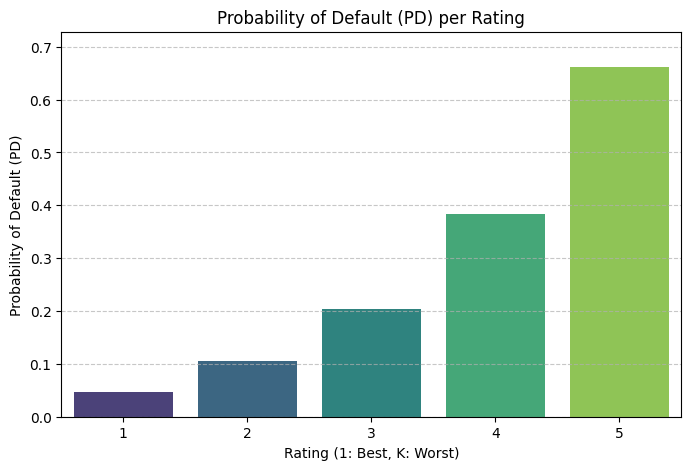

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Rating', y='Probability of Default (PD)', data=results_df, palette='viridis')
plt.title('Probability of Default (PD) per Rating')
plt.xlabel('Rating (1: Best, K: Worst)')
plt.ylabel('Probability of Default (PD)')
plt.ylim(0, results_df['Probability of Default (PD)'].max() * 1.1) # Add a little padding above the max PD
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# Implement random sampling on the DataFrame
sample_fraction = 0.1  # Adjust this to the desired fraction of data to sample
sample_df = df.sample(frac=sample_fraction, random_state=42)

print(f"Original DataFrame size: {len(df)}")
print(f"Sampled DataFrame size: {len(sample_df)}")

# You can now use sample_df for further analysis or dynamic programming
# For example, convert the sampled DataFrame to the 'data' list format:
data = sample_df[['fico_score', 'default']].sort_values(by='fico_score').values.tolist()
n = len(data) # Update n to the size of the sampled data

print("Sampled data prepared for DP.")

Original DataFrame size: 10000
Sampled DataFrame size: 1000
Sampled data prepared for DP.


In [6]:
# Backtrack to find the optimal bucket boundaries
bucket_boundaries_indices = []
current_end = n
for k in range(K, 0, -1):
    current_start = backpointers[k][current_end]
    bucket_boundaries_indices.append(current_start)
    current_end = current_start

# The indices are in reverse order, so reverse them
bucket_boundaries_indices.reverse()

# Add the start and end indices
# The first bucket starts at index 0, and the last bucket ends at index n-1
# The backpointers give the start of each bucket *except* the first one
# So we need to add 0 at the beginning and n at the end to define the full ranges
full_bucket_indices = [0] + bucket_boundaries_indices[1:] + [n]


# Extract the FICO scores at the boundaries.
# The boundaries are the FICO scores at the start of each bucket, except the first one.
# The last boundary is the FICO score of the last data point.
optimal_boundaries = [data[i][0] for i in full_bucket_indices[1:-1]]
# Add the minimum and maximum FICO scores as the absolute boundaries
optimal_boundaries.insert(0, data[0][0])
optimal_boundaries.append(data[-1][0])


print("Optimal bucket boundaries indices (start of each bucket):", bucket_boundaries_indices)
print("Full bucket indices (start of first bucket, start of subsequent buckets, end of last bucket):", full_bucket_indices)
print("Optimal bucket boundaries (FICO scores):", optimal_boundaries)

Optimal bucket boundaries indices (start of each bucket): [0, 302, 1697, 5144, 8351]
Full bucket indices (start of first bucket, start of subsequent buckets, end of last bucket): [0, 302, 1697, 5144, 8351, 10000]
Optimal bucket boundaries (FICO scores): [408, 521, 580, 640, 697, 850]


In [4]:
# Fill the DP table
for k in range(2, K + 1):
    for j in range(k, n + 1):
        for i in range(k - 1, j):
            log_likelihood = calculate_log_likelihood(i, j)
            if dp[k-1][i] + log_likelihood > dp[k][j]:
                dp[k][j] = dp[k-1][i] + log_likelihood
                backpointers[k][j] = i

print("DP table filled.")

DP table filled.


In [3]:
# Precompute cumulative sums for defaults and records
n = len(data)
cumulative_defaults = [0] * (n + 1)
cumulative_records = [0] * (n + 1)

for i in range(n):
    cumulative_defaults[i+1] = cumulative_defaults[i] + data[i][1]
    cumulative_records[i+1] = cumulative_records[i] + 1

# Function to calculate log-likelihood for a segment of data
def calculate_log_likelihood(start, end):
    """Calculates the binomial log-likelihood for data from index start to end (exclusive)."""
    num_defaults = cumulative_defaults[end] - cumulative_defaults[start]
    num_records = cumulative_records[end] - cumulative_records[start]

    if num_records == 0:
        return 0 # Or some very small negative number

    prob_default = num_defaults / num_records

    # Handle edge cases for log(0)
    epsilon = 1e-9
    prob_default = max(epsilon, min(1 - epsilon, prob_default))

    log_likelihood = num_defaults * np.log(prob_default) + (num_records - num_defaults) * np.log(1 - prob_default)
    return log_likelihood

# Set up DP table and backpointers
K = 5 # Number of buckets - can be adjusted
dp = [[-np.inf] * (n + 1) for _ in range(K + 1)]
backpointers = [[-1] * (n + 1) for _ in range(K + 1)]

# Base case: 1 bucket
for j in range(1, n + 1):
    dp[1][j] = calculate_log_likelihood(0, j)
    backpointers[1][j] = 0

print("Cumulative sums precomputed and DP table initialized.")

Cumulative sums precomputed and DP table initialized.
